EDA FOR THE STUDENT PERFORMANCE DATASET

1. PROBLEM STATEMENT <----------->

THIS DATASET CONTAINS STUDENTS AND THEIR RESPECTIVE SCORES AND AND OTHER FEATURES WE HAVE TO UNDERSTAND THE REALTION BETWEEN
THE FEATURES AND WHICH FEATURE AFFECT THE DATA MOST 

2. SOURCE OF THE DATA 
. DATASET SOURCE - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
. DATASET SHAPE - THIS DATA HAS 8 COLUMNS AND 1000 ROWS

2.1 IMPORTING THE REQUIRED LIABRARIES AND PACKAGES 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

IMPORTING THE DATA FROM THE STUD FILE IN NOTEBOOK

In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Pallavi\OneDrive\Documents\machine learming project\notebook\data\stud.csv")



In [3]:
import os
print(os.getcwd())

c:\Users\Pallavi\OneDrive\Documents\machine learming project\notebook\data


In [4]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


3. CHECKING THE DATATYPE OF EACH COLUMNS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.1 CHECKING IF THE NULL VALUES ARE PRESENT IN THE SET OR NOT

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3.2 CHECKING FOR THE ANY DUPLICATE ENTRY IN THE DATASET

In [7]:
df.duplicated().sum()

0

3.3 CHECKING FOR THE UNIQUE VALUES 

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


3.5 NOW GETTING THE NUMERICAL AND CATEGORICAL FEATURES


In [ ]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("we have {} numerical features: {}".format(len(num_features),num_features))
print("we have {} categorical features:{}".format(len(cat_features),cat_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.6 ADDING THE COLUMN AVERAGE AND TOTAL_SCORE

In [34]:
df['Total_score'] = df['math_score'] + df['reading_score'] +df['writing_score']
df['average'] = df['Total_score']/3

In [ ]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


3.8 NOW CHECKING THE TOP SCORERS AND THE BOTTOM SCORERS

In [ ]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


3.8 student who scores 20 or less

In [ ]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


4 VISUALISING THE DATA

<function matplotlib.pyplot.show(close=None, block=None)>

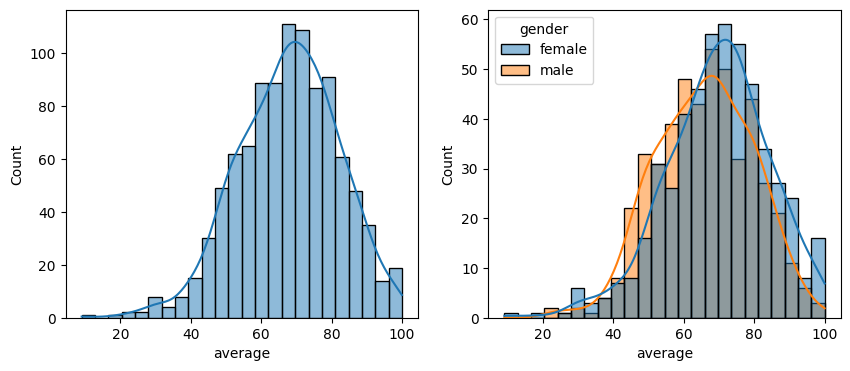

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(10,4))
# dist of average
sns.histplot(data = df , x='average' ,kde='False' , ax=axs[0])
# dist of average compared to gender
sns.histplot(data = df , x='average' ,kde='False' ,hue='gender', ax=axs[1])
plt.show

4.2 NOW CHECKING THE WHICH FEATURES HAS IMPACT ON PERFORMANCE IN EXAMS

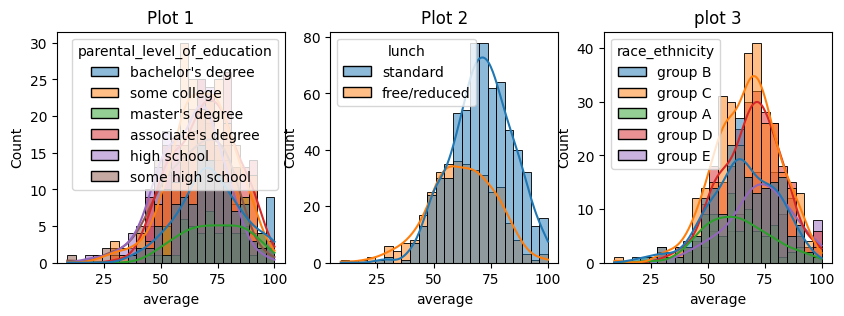

In [ ]:
fig,axs= plt.subplots(1,3,figsize=(10,3))
# average respect to parental level of education
sns.histplot(data=df,x='average',kde='True',hue='parental_level_of_education',ax=axs[0])
# average reaspect to lunch
sns.histplot(data=df,x='average',kde='True',hue='lunch',ax=axs[1])
# average respect to race
sns.histplot(data=df,x='average',kde='True',hue='race_ethnicity',ax=axs[2])

axs[0].set_title("Plot 1")
axs[1].set_title("Plot 2")
axs[2].set_title("plot 3")

plt.show()


CONCLUSION:

1. for parental education: not a great realtion with average scores but parents who have did college have slighlty better average also because most of parents have a college level education.

2. lunch: we can see student having standar lunch have a higher average


4.3 MAXIMUM SCORES OF STUDENTS IN ALL THREE SUBJECT

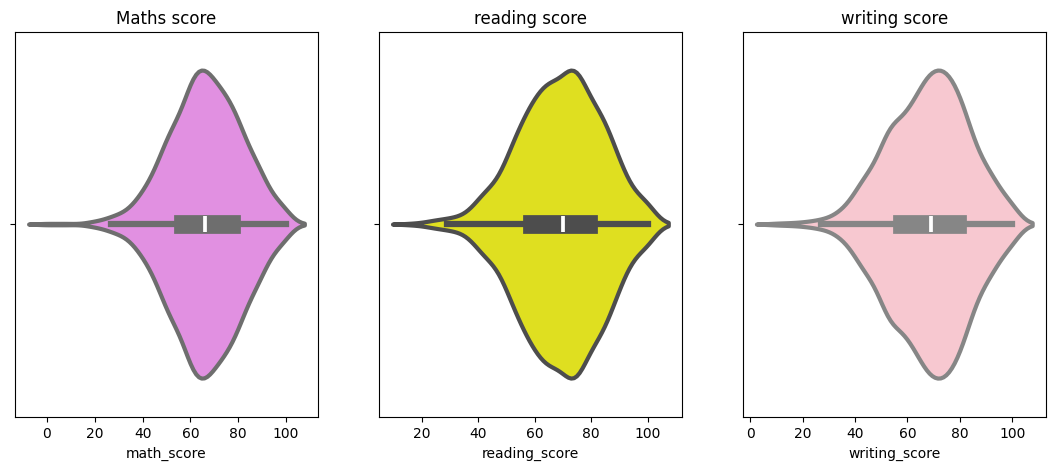

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(141)
plt.title("Maths score")
sns.violinplot(x='math_score',data=df,color='violet',linewidth=3)
plt.subplot(142)
plt.title("reading score")
sns.violinplot(x='reading_score',data=df,color='yellow',linewidth=3)
plt.subplot(143)
plt.title("writing score")
sns.violinplot(x='writing_score',data=df,color='pink',linewidth=3)

plt.show()

4.3 MULTIVARIATE ANALYSIS USING PIEPLOT

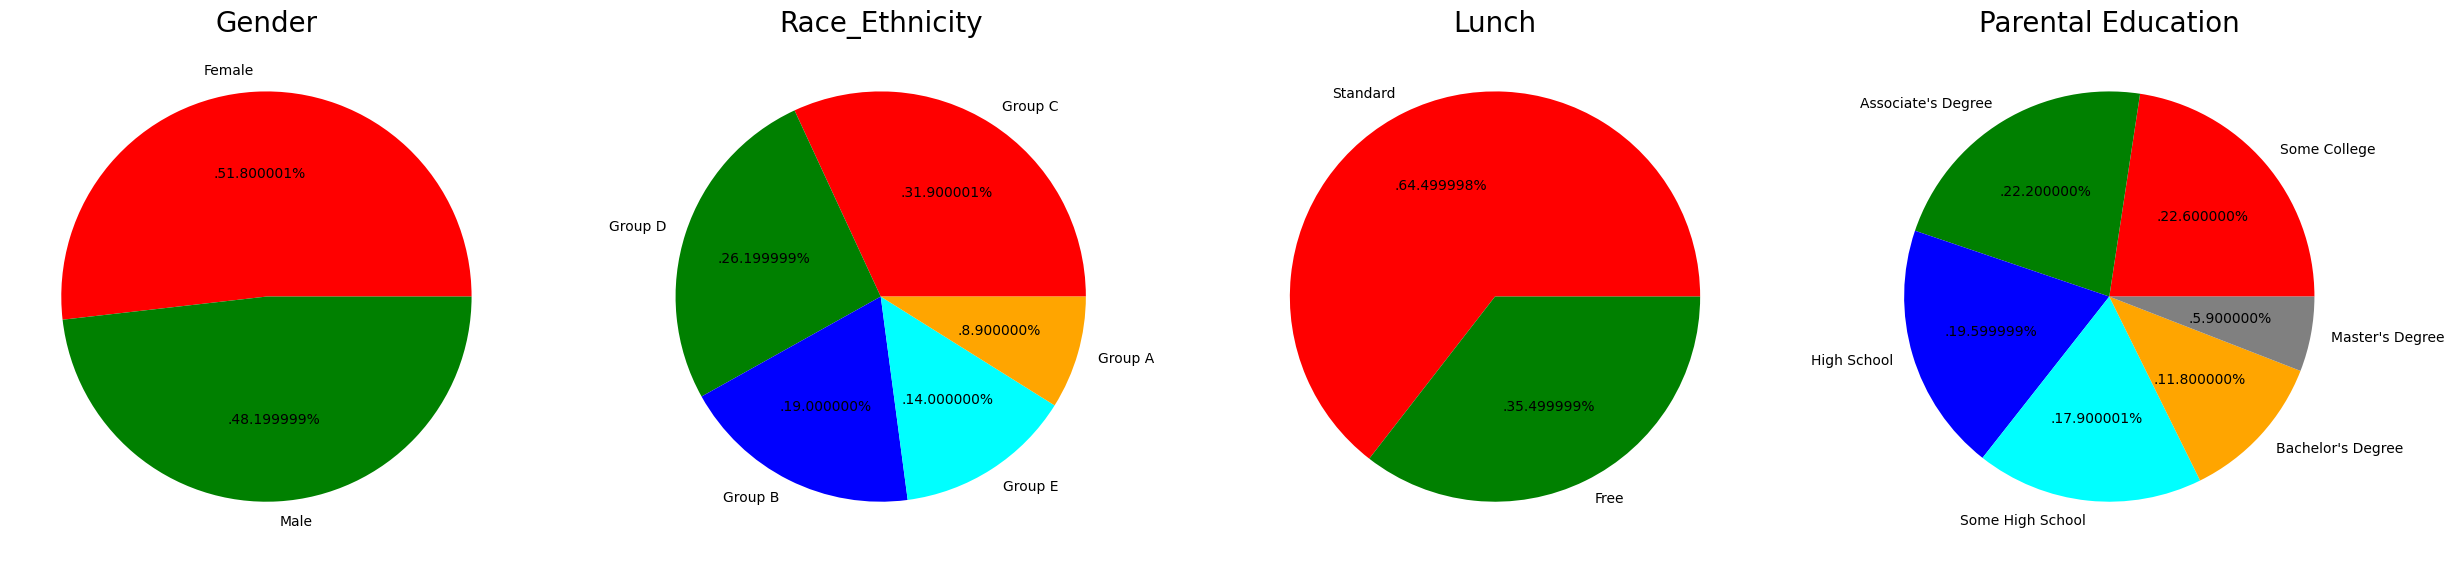

In [ ]:

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()



Insights :
1.Number of Male and Female students is almost equal
2.Number students are greatest in Group C
3.Number of students who have standard lunch are greater
4.Number of students who have not enrolled in any test preparation course is greater
5.Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

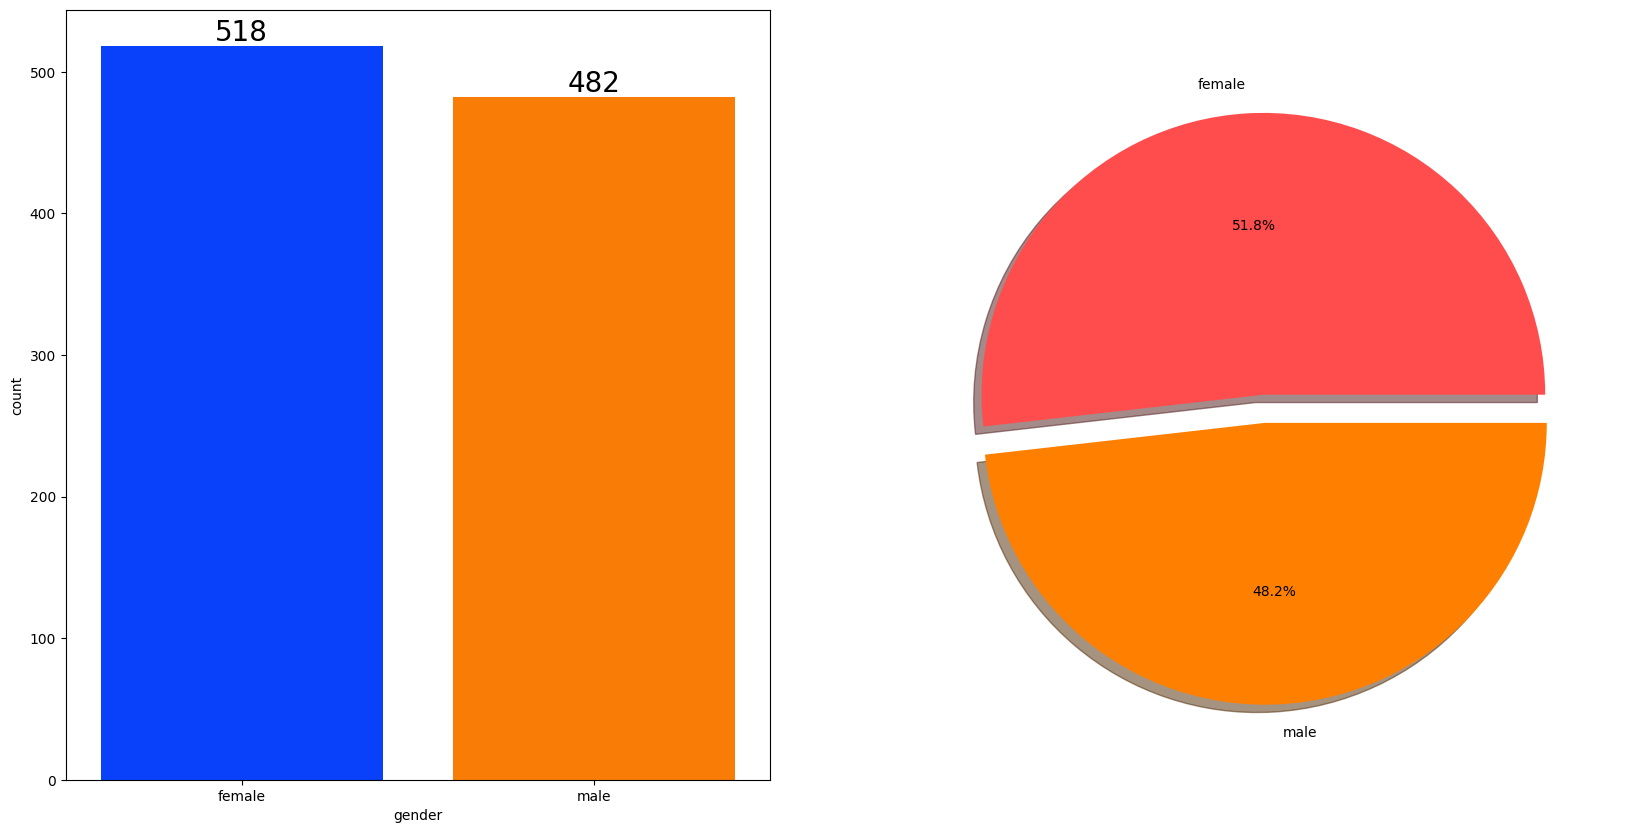

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['female','male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True ,colors=['#ff4d4d','#ff8000'])
plt.show()

insights:
1. we have slighty more female students then male students

4.3 BIVARIATE ANALYSIS CHECKING THE IMPACT OF GENDER 

In [29]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [39]:
numeric_colums = df.select_dtypes(include="number").columns
gender_group = df.groupby('gender')[numeric_colums].mean()
print(gender_group)

        math_score  reading_score  writing_score  Total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


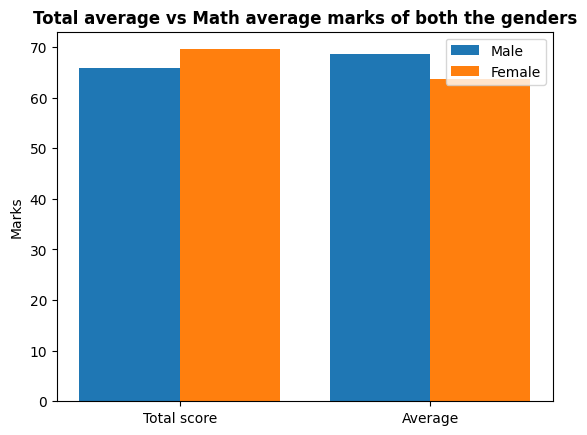

In [52]:
X = ['Total Average','Math Average']
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores   = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')
plt.xticks(X_axis,x)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both the genders", fontweight='bold')
plt.legend()

plt.show()